In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [2]:
# Suppress TensorFlow informational messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"Training images shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28), Training labels shape: (60000,)
Test images shape: (10000, 28, 28), Test labels shape: (10000,)


In [4]:
# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0



In [5]:
# Reshape images to include channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)



In [6]:
# Define the CNN model architecture
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model with optimizer, loss, and metrics
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [8]:
# Train the model on training data with validation split
training_history = cnn_model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)



Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.8749 - loss: 0.4212 - val_accuracy: 0.9811 - val_loss: 0.0598
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9833 - loss: 0.0533 - val_accuracy: 0.9874 - val_loss: 0.0464
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9888 - loss: 0.0373 - val_accuracy: 0.9856 - val_loss: 0.0502
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9913 - loss: 0.0259 - val_accuracy: 0.9877 - val_loss: 0.0487
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9935 - loss: 0.0193 - val_accuracy: 0.9900 - val_loss: 0.0372


In [9]:
# Evaluate model performance on test data
eval_loss, eval_acc = cnn_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {eval_acc:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9869 - loss: 0.0416
Test Accuracy: 0.9904


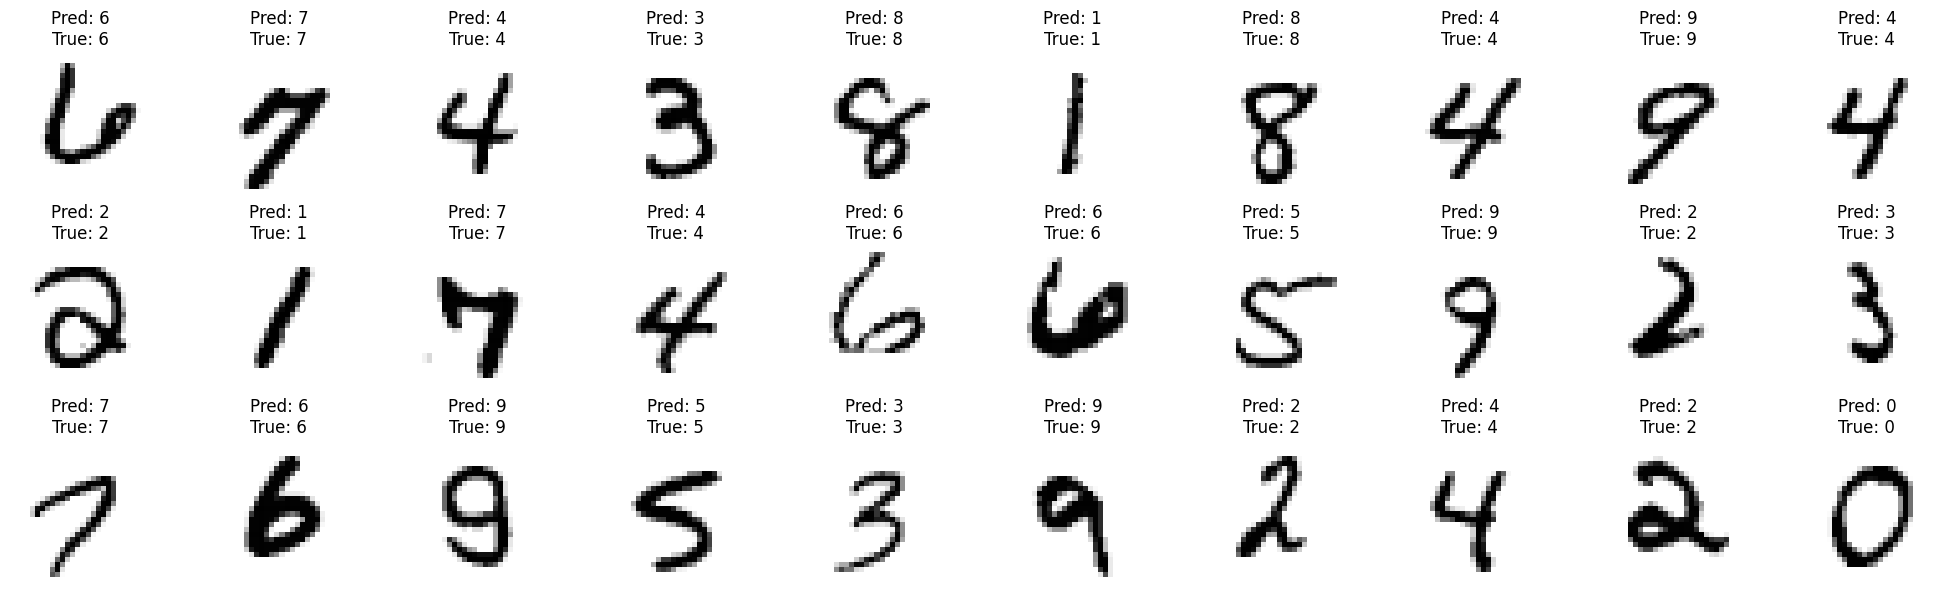

In [10]:
# Visualize random predictions from the test set
num_rows, num_cols = 3, 10
plt.figure(figsize=(20, 6))
for idx in range(num_rows * num_cols):
    sample_idx = random.randint(0, test_images.shape[0] - 1)
    sample_img = test_images[sample_idx].reshape(28, 28)
    predicted_label = np.argmax(cnn_model.predict(test_images[sample_idx:sample_idx + 1], verbose=0))
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(sample_img, cmap='gray_r')
    plt.title(f"Pred: {predicted_label}\nTrue: {test_labels[sample_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Training shape: (60000, 28, 28, 1)
Testing shape : (10000, 28, 28, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,306 (1.49 MB)

 Trainable params: 390,858 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8749 - loss: 0.4594

750/750 ━━━━━━━━━━━━━━━━━━━━ 118s 153ms/step - accuracy: 0.8749 - loss: 0.4590 - val_accuracy: 0.9864 - val_loss: 0.0469
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 159ms/step - accuracy: 0.9779 - loss: 0.0706 - val_accuracy: 0.9844 - val_loss: 0.0509
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9833 - loss: 0.0561

750/750 ━━━━━━━━━━━━━━━━━━━━ 138s 153ms/step - accuracy: 0.9833 - loss: 0.0561 - val_accuracy: 0.9881 - val_loss: 0.0435
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 160ms/step - accuracy: 0.9868 - loss: 0.0428 - val_accuracy: 0.9877 - val_loss: 0.0530
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9879 - loss: 0.0425

750/750 ━━━━━━━━━━━━━━━━━━━━ 117s 156ms/step - accuracy: 0.9879 - loss: 0.0425 - val_accuracy: 0.9892 - val_loss: 0.0438
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9900 - loss: 0.0336

750/750 ━━━━━━━━━━━━━━━━━━━━ 112s 150ms/step - accuracy: 0.9900 - loss: 0.0336 - val_accuracy: 0.9902 - val_loss: 0.0421
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 156ms/step - accuracy: 0.9907 - loss: 0.0314 - val_accuracy: 0.9848 - val_loss: 0.0639
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 119s 159ms/step - accuracy: 0.9937 - loss: 0.0232 - val_accuracy: 0.9890 - val_loss: 0.0447
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9933 - loss: 0.0225

750/750 ━━━━━━━━━━━━━━━━━━━━ 115s 153ms/step - accuracy: 0.9933 - loss: 0.0225 - val_accuracy: 0.9909 - val_loss: 0.0391
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 153ms/step - accuracy: 0.9948 - loss: 0.0183 - val_accuracy: 0.9882 - val_loss: 0.0573
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 114s 152ms/step - accuracy: 0.9943 - loss: 0.0192 - val_accuracy: 0.9894 - val_loss: 0.0538
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 114s 151ms/step - accuracy: 0.9944 - loss: 0.0199 - val_accuracy: 0.9904 - val_loss: 0.0507
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9902 - loss: 0.0383

Test Accuracy: 0.9920


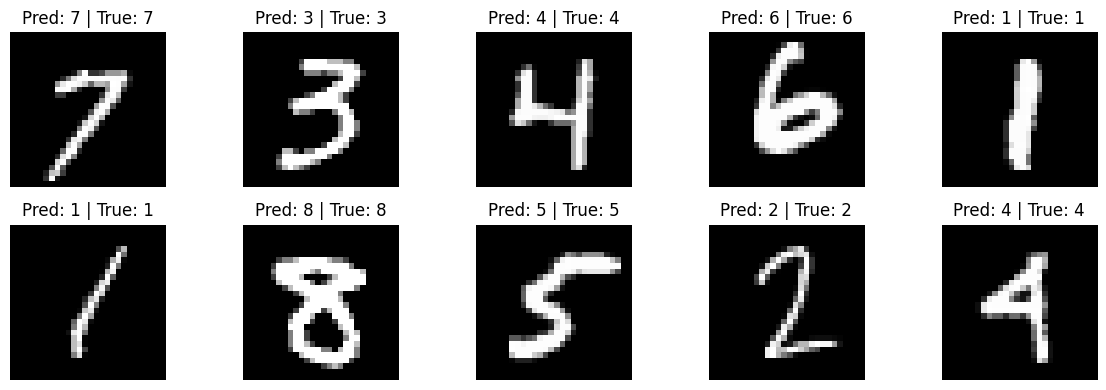

In [12]:
# Digit Recognition using an Improved CNN on MNIST

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# -----------------------------
# Load and preprocess data
# -----------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Reshape (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

print("Training shape:", x_train.shape)
print("Testing shape :", x_test.shape)

# -----------------------------
# Build the BEST CNN model
# -----------------------------
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(10, activation="softmax")
])

model.summary()

# -----------------------------
# Compile the model
# -----------------------------
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# -----------------------------
# Callbacks
# -----------------------------
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_mnist_model.h5",
    monitor="val_accuracy",
    save_best_only=True
)

# -----------------------------
# Train the model
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

# -----------------------------
# Evaluate on test data
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# -----------------------------
# Visualize predictions
# -----------------------------
plt.figure(figsize=(12, 4))
for i in range(10):
    idx = random.randint(0, len(x_test) - 1)
    img = x_test[idx].reshape(28, 28)
    pred = np.argmax(model.predict(x_test[idx:idx+1], verbose=0))

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Pred: {pred} | True: {y_test[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import display, Image
import matplotlib.pyplot as plt
from google.colab import output
import io
from PIL import Image as PILImage
import base64


model = load_model('/content/mnist_model.keras')


def to_model_shape(x28):
    x28 = x28.astype("float32") / 255.0
    return x28.reshape(1, 28, 28, 1)


def preprocess_mnist(roi_bgr):
    """Convert the ROI to a 28x28 image and preprocess it for model prediction"""
    # Convert to grayscale and apply blur + threshold
    g = cv2.cvtColor(roi_bgr, cv2.COLOR_BGR2GRAY)
    g = cv2.GaussianBlur(g, (5, 5), 0)
    th = cv2.adaptiveThreshold(
        g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

        # Find contours and select the largest one
    cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        return None, {"reason": "no contour"}

    c = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    if w * h < 300:   # Reject tiny contours
        return None, {"reason": "small contour"}

    # Prepare the region of interest (ROI) for prediction
    roi = th[y:y+h, x:x+w]
    resized_roi = cv2.resize(roi, (28, 28))
    model_input = to_model_shape(resized_roi)
    return model_input, {"bounding_box": (x, y, w, h)}


# JavaScript function to capture an image using the webcam
from google.colab.output import eval_js
def take_picture():
    js = """
    async function takePicture() {
        const video = document.createElement('video');
        video.width = 640;
        video.height = 480;
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await new Promise((resolve) => { video.onloadedmetadata = () => { resolve(video); }; });
        video.play();
        const canvas = document.createElement('canvas');
        canvas.width = 640;
        canvas.height = 480;
        const context = canvas.getContext('2d');
        context.drawImage(video, 0, 0, 640, 480);
        const imageUrl = canvas.toDataURL('image/png');
        stream.getTracks().forEach(track => track.stop());
        return imageUrl;
    }
    takePicture();
    """
    return eval_js(js)


# Capture and predict number
image_data = take_picture()  # Capture image from webcam
image_bytes = io.BytesIO(base64.b64decode(image_data.split(',')[1]))  # Decode the image data
img = PILImage.open(image_bytes)  # Convert to PIL image
plt.imshow(img)  # Display the image
plt.show()


# Convert the image to numpy array (OpenCV format)
roi_bgr = np.array(img)


# Preprocess the captured image for prediction
model_input, _ = preprocess_mnist(roi_bgr)


# Predict the digit using the model
prediction = model.predict(model_input)
predicted_digit = np.argmax(prediction)


# Output the predicted digit
print(f"Predicted Digit: {predicted_digit}")
